## import modules

In [158]:
import yfinance as yf
import pandas as pd
import numpy as np

In [159]:
ticker = "MSFT"
df = yf.download(ticker)
df.drop(columns="Adj Close", inplace=True)
df.index = [d.strftime("%Y-%m-%d") for d in df.index]
df.head(3)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1986-03-13,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17,0.102431,0.103299,0.100694,0.100694,133171200


In [160]:
df["change_tomorrow"] = df["Close"].pct_change(-1)*100
# df.drop(columns="change_tomorrow", inplace=True)


In [161]:
df = df.dropna().copy()
df

Price,Close,High,Low,Open,Volume,change_tomorrow
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
1986-03-13,0.097222,0.101563,0.088542,0.088542,1031788800,-3.448071
1986-03-14,0.100694,0.102431,0.097222,0.097222,308160000,-1.695774
1986-03-17,0.102431,0.103299,0.100694,0.100694,133171200,2.609539
1986-03-18,0.099826,0.103299,0.098958,0.102431,67766400,1.769803
1986-03-19,0.098090,0.100694,0.097222,0.099826,47894400,2.727102
...,...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,-0.729111
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,-2.075301
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,-1.234046


In [162]:
df["change_tomorrow_direction"] = df.change_tomorrow.apply(lambda v: 1 if v>0 else 0)
df

Price,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
1986-03-13,0.097222,0.101563,0.088542,0.088542,1031788800,-3.448071,0
1986-03-14,0.100694,0.102431,0.097222,0.097222,308160000,-1.695774,0
1986-03-17,0.102431,0.103299,0.100694,0.100694,133171200,2.609539,1
1986-03-18,0.099826,0.103299,0.098958,0.102431,67766400,1.769803,1
1986-03-19,0.098090,0.100694,0.097222,0.099826,47894400,2.727102,1
...,...,...,...,...,...,...,...
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,-0.729111,0
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,-2.075301,0
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,-1.234046,0


<Axes: >

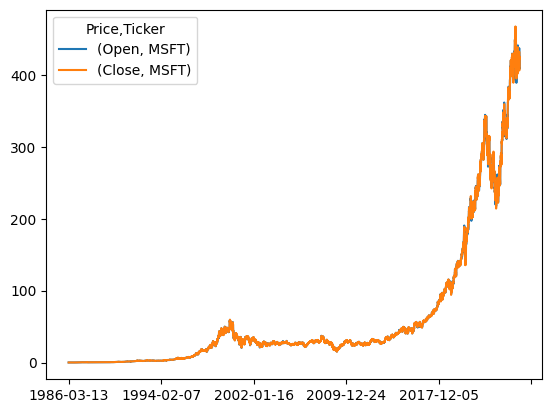

In [165]:
df[["Open","Close"]].plot()

## Normalizing the columns to have all values between -1 and 1

In [166]:
def normalize_column(column):
    try:
        max_val = column.max()
        min_val = column.min()
        abs_max = max(abs(max_val), abs(min_val))
        return column/abs_max
    except:
        return column

In [167]:
df_normal = df.apply(normalize_column)

<Axes: >

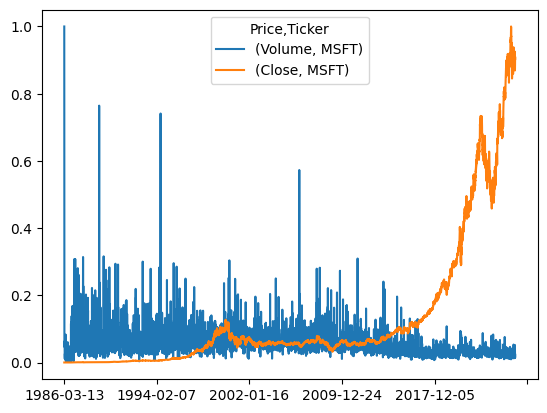

In [168]:
df_normal[["Volume","Close"]].plot()

## Training the model, all data

In [169]:
target = df.change_tomorrow_direction
training_date = df.drop(columns=["change_tomorrow","change_tomorrow_direction"])

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
model_dt = DecisionTreeClassifier(max_depth=6)
model_dt.fit(X=training_date, y=target)

DecisionTreeClassifier(max_depth=6)

[Text(0.40922619047619047, 0.9285714285714286, 'x[0] <= 2.518\ngini = 0.499\nsamples = 9744\nvalue = [5130, 4614]'),
 Text(0.1636904761904762, 0.7857142857142857, 'x[4] <= 3038400.0\ngini = 0.488\nsamples = 1701\nvalue = [984, 717]'),
 Text(0.15178571428571427, 0.6428571428571429, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.17559523809523808, 0.6428571428571429, 'x[0] <= 0.344\ngini = 0.487\nsamples = 1696\nvalue = [984, 712]'),
 Text(0.09523809523809523, 0.5, 'x[4] <= 47008800.0\ngini = 0.461\nsamples = 367\nvalue = [235, 132]'),
 Text(0.047619047619047616, 0.35714285714285715, 'x[3] <= 0.101\ngini = 0.49\nsamples = 189\nvalue = [108, 81]'),
 Text(0.023809523809523808, 0.21428571428571427, 'x[0] <= 0.099\ngini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(0.011904761904761904, 0.07142857142857142, 'gini = 0.42\nsamples = 30\nvalue = [21, 9]'),
 Text(0.03571428571428571, 0.07142857142857142, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.07142857142857142, 0.2142857142

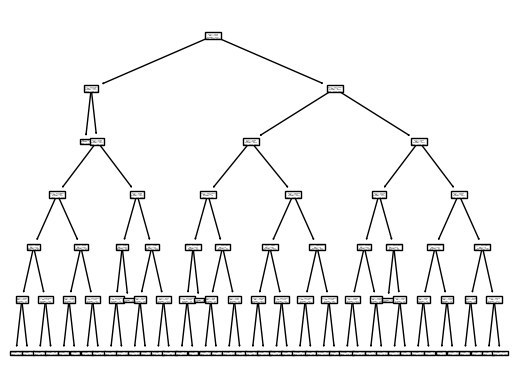

In [172]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model_dt)

In [175]:
prediction = model_dt.predict(X=training_date)


In [176]:
df["prediction"]=prediction
df.tail(8)


Price,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction,prediction
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,,
2024-10-30,432.529999,438.500000,432.100006,437.440002,29749100,6.442720,1,1
2024-10-31,406.350006,416.160004,406.299988,415.359985,53971000,-0.979601,0,1
2024-11-01,410.369995,415.500000,407.500000,409.010010,24230400,0.467611,1,0
2024-11-04,408.459991,410.420013,405.570007,409.799988,19672300,-0.729111,0,0
2024-11-05,411.459991,414.899994,408.079987,408.369995,17626000,-2.075301,0,0
2024-11-06,420.179993,420.450012,410.519989,412.420013,26681800,-1.234046,0,0
2024-11-07,425.429993,426.850006,419.880005,421.279999,19901800,0.683955,1,0
2024-11-08,422.540009,426.500000,421.779999,425.320007,16891400,1.083706,1,0


In [177]:
correct_prediction = df.prediction == df.change_tomorrow_direction
correct_prediction.sum()/len(correct_prediction)

0.5523399014778325

## Now let's work with test and training sets

In [178]:
from sklearn.model_selection import train_test_split


In [179]:
X = df.drop(columns=["change_tomorrow","change_tomorrow_direction","prediction"])
y = df.change_tomorrow_direction

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

8769
975
8769
975


In [181]:
model_dt_2 = DecisionTreeClassifier(max_depth=1)
model_dt_2.fit(X=X_train,y=y_train)


DecisionTreeClassifier(max_depth=1)

In [182]:
train_prediction = model_dt_2.predict(X_train)
correct = train_prediction==y_train
print(correct.sum()/len(correct))

0.5263998175390581


In [183]:
test_prediction = model_dt_2.predict(X_test)
correct = test_prediction==y_test
print(correct.sum()/len(correct))

0.5271794871794871


[Text(0.5, 0.75, 'x[0] <= 2.518\ngini = 0.499\nsamples = 8769\nvalue = [4616, 4153]'),
 Text(0.25, 0.25, 'gini = 0.486\nsamples = 1514\nvalue = [885, 629]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 7255\nvalue = [3731, 3524]')]

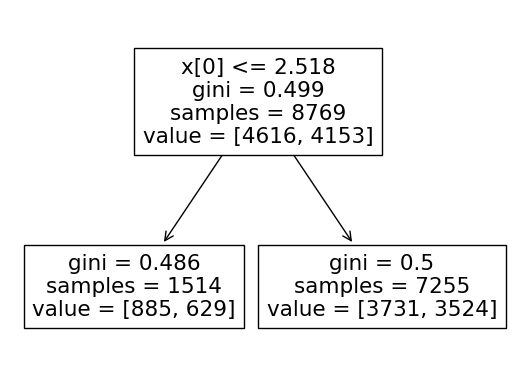

In [184]:
plot_tree(decision_tree=model_dt_2)

## Can I set up a neural network?

In [187]:
import tensorflow as tf
from tensorflow import keras


In [208]:
model_nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [209]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [210]:
model_nn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
275/275 [==============================] - 2s 4ms/step - loss: 43639.9766 - accuracy: 0.5050 - val_loss: 25538.4414 - val_accuracy: 0.5272
Epoch 2/30
275/275 [==============================] - 1s 3ms/step - loss: 14964.4854 - accuracy: 0.5072 - val_loss: 35606.3164 - val_accuracy: 0.5272
Epoch 3/30
275/275 [==============================] - 1s 3ms/step - loss: 12124.7090 - accuracy: 0.5052 - val_loss: 4797.0840 - val_accuracy: 0.5272
Epoch 4/30
275/275 [==============================] - 1s 3ms/step - loss: 5684.7720 - accuracy: 0.5103 - val_loss: 6764.8511 - val_accuracy: 0.4728
Epoch 5/30
275/275 [==============================] - 1s 3ms/step - loss: 3651.7285 - accuracy: 0.5079 - val_loss: 686.6920 - val_accuracy: 0.4728
Epoch 6/30
275/275 [==============================] - 1s 3ms/step - loss: 2300.3933 - accuracy: 0.5074 - val_loss: 3719.7700 - val_accuracy: 0.4728
Epoch 7/30
275/275 [==============================] - 1s 3ms/step - loss: 2018.9904 - accuracy: 0.5009 - val

In [212]:
train_loss, train_accuracy = model_nn.evaluate(X_train, y_train)
test_loss, test_accuracy = model_nn.evaluate(X_test, y_test)
print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')


31/31 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5272
Train accuracy: 0.5263997912406921
Test accuracy: 0.527179479598999
